<a href="https://colab.research.google.com/github/dataforgoodfr/batch7_satellite_ges/blob/work-basis/notebooks/04_01_OCO2_Work_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

# OCO2 - Working basis

Project for **Data For Good**, season 7. 

*By Quentin Kamenda*


---

## Introduction

Using Data from [OCO-2 Satellite](en.wikipedia.org/wiki/Orbiting_Carbon_Observatory_2), issued by the NASA.

`//TODO: Explanation`

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap  #Imported directly from the github repository

## Retieve Data

Sample data can be accessed freely on the NASA Database, among other open data from several NASA sattelites.

We will be using CSV aggregated by *Benoit Courty* [here](https://http://benemie.fr/OCO2/).

In [0]:
path = "http://benemie.fr/OCO2/oco2_1610.csv"

data = pd.read_csv(path, sep=";")
data.head()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v
0,2016100101110037,-51.334530,-168.044601,401.371155,0.705995,11967,10.771300,5.545009
1,2016100101110038,-51.333263,-168.072342,401.515686,0.710246,11967,10.760405,5.543176
2,2016100101110073,-51.320339,-167.939957,401.222321,0.683168,11967,10.800521,5.544136
3,2016100101110074,-51.319645,-167.967422,401.089478,0.656449,11967,10.790007,5.542420
4,2016100101110078,-51.315422,-168.077682,401.365204,0.592020,11967,10.746749,5.534678


In [0]:
data.describe()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v
count,3.024276e+06,3.024276e+06,3.024276e+06,3.024276e+06,3.024276e+06,3.024276e+06,3.024276e+06,3.024276e+06
mean,2.016102e+15,1.324818e+00,-5.600296e+00,4.010591e+02,5.174169e-01,1.218820e+04,-1.020301e+00,1.663797e-01
std,8.916023e+08,2.755684e+01,1.129373e+02,1.075270e+00,1.495343e-01,1.300486e+02,4.615376e+00,3.432757e+00
min,2.016100e+15,-8.387027e+01,-1.800000e+02,3.777528e+02,2.281137e-01,1.196700e+04,-1.469402e+01,-1.457901e+01
25%,2.016101e+15,-2.179360e+01,-1.151748e+02,4.003780e+02,4.063131e-01,1.207700e+04,-4.666386e+00,-2.236219e+00
50%,2.016102e+15,-6.581235e-01,-6.495946e+00,4.010392e+02,4.813752e-01,1.218800e+04,-1.937398e+00,1.818803e-01
75%,2.016102e+15,2.607888e+01,9.284271e+01,4.016435e+02,5.995146e-01,1.229900e+04,2.222596e+00,2.623085e+00
max,2.016103e+15,7.221116e+01,1.799999e+02,4.138470e+02,1.915974e+00,1.241700e+04,2.047964e+01,1.705045e+01


##### To convert the  ``` sounding_id ``` into a datetime variable ```data```:



In [0]:
from datetime import datetime
def to_date(a):
    return datetime.strptime(str(a), '%Y%m%d%H%M%S%f')

data['date'] = data['sounding_id'].apply(to_date)

In [0]:
data.head()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v,date
0,2016100101110037,-51.334530,-168.044601,401.371155,0.705995,11967,10.771300,5.545009,2016-10-01 01:11:00.370
1,2016100101110038,-51.333263,-168.072342,401.515686,0.710246,11967,10.760405,5.543176,2016-10-01 01:11:00.380
2,2016100101110073,-51.320339,-167.939957,401.222321,0.683168,11967,10.800521,5.544136,2016-10-01 01:11:00.730
3,2016100101110074,-51.319645,-167.967422,401.089478,0.656449,11967,10.790007,5.542420,2016-10-01 01:11:00.740
4,2016100101110078,-51.315422,-168.077682,401.365204,0.592020,11967,10.746749,5.534678,2016-10-01 01:11:00.780


---

## Show Data on the map

##### **draw_map**: Function to draw the map and the observations (relief style). The column names can be specified in the arguments.

*Parameters*: 

*   (DataFrame) data: the dataset to map.
*   (string) **x** : the name of the longitude column. *default: 'longitide'*
*   (string) **y**: the name of the latitude column. *default: 'latitude'*
*   (string) **c**: the name of the XCO2 column (or other measure wanted to be plotted). *default: 'xco2'*
*   (int) **lon_min** : the minimum longitude. *default: -180*
*   (int) **lon_max**: the maximum longitude. *default: 180*
*   (int) **lat_min**: the minimum latitude. *default: -90*
*   (int) **lat_max**: the maximum latitude. *default: 90*
*   (int) **size_point**: size of the point to plot (useful if we zoom in). *default: 1*
*   (Bool) **frontier**: whether or not to draw the countries borders. *default: False*



In [0]:
def draw_map(data, x="longitude", y="latitude", c="xco2", lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=1, frontier=False):

    plt.figure(figsize=(15, 10), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
    
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    normal = matplotlib.colors.LogNorm(vmin=data[c].min(), vmax=data[c].max())

    m.scatter(data[x], data[y], c=data[c], cmap=plt.cm.jet, s=size_point, norm=normal)

    if (frontier):
      m.drawcountries(linewidth=0.5)
      m.drawcoastlines(linewidth=0.7)

    plt.show()

Visualisation of Data for the whole dataset loaded, whole world with coastlines and frontiers. Here the dataset includes data for 


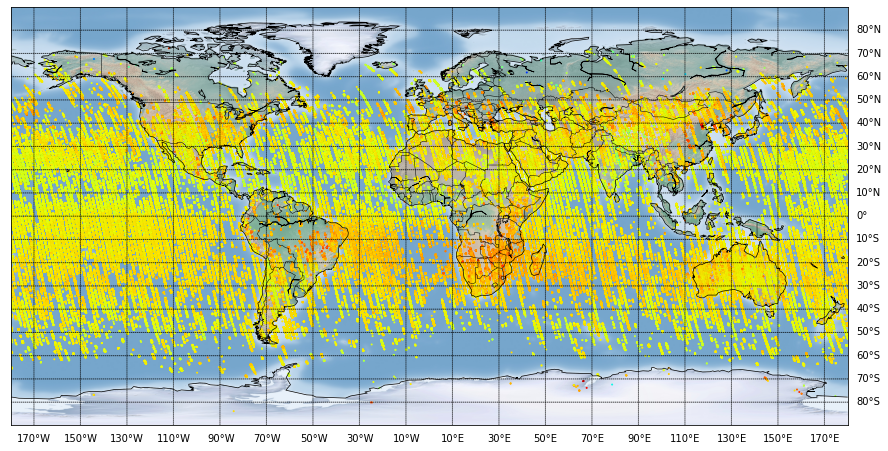

In [0]:
# OCO-2 data for October 2016 in the whole world
draw_map(data, frontier=True)

---

## Filter Data for a Specific Zone

##### **get_data_zone**: retrieve the data for one specific zone.

Parameters:

*   (DataFrame) **data**: the origin dataset. 
*   (string) **x** : the name of the longitude column. *default: 'longitide'*
*   (string) **y**: the name of the latitude column. *default: 'latitude'*
*   (int) **lon_min** : the minimum longitude. *default: -180*
*   (int) **lon_max**: the maximum longitude. *default: 180*
*   (int) **lat_min**: the minimum latitude. *default: -90*
*   (int) **lat_max**: the maximum latitude. *default: 90*




In [0]:
def get_data_zone(data, x="longitude", y="latitude",lon_min=-180, lon_max=180, lat_min=-90, lat_max=90):
    data = data[data[x] < lon_max]
    data = data[data[x] > lon_min]
    data = data[data[y] < lat_max]
    data = data[data[y] > lat_min]
    return data

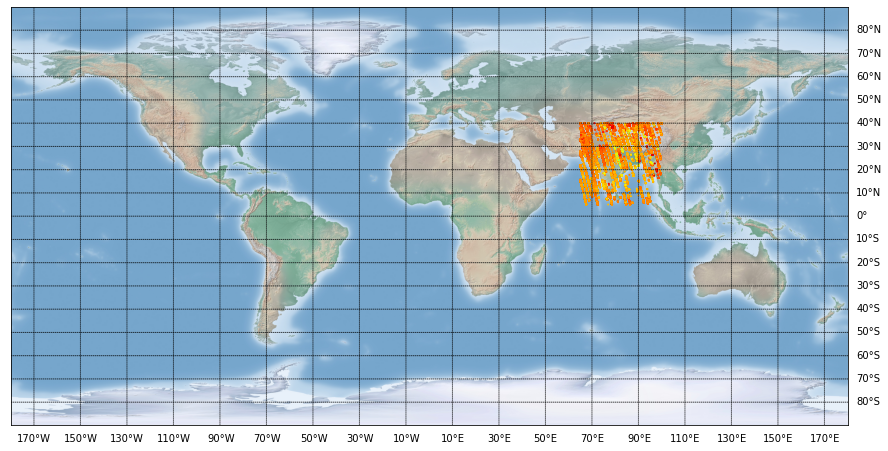

In [0]:
#Retrieve the data in a bounding box [65-100;5-40] corresponding roughly to India
data_india = get_data_zone(data, lon_min=65, lon_max=100, lat_min=5, lat_max=40)
draw_map(data_india)

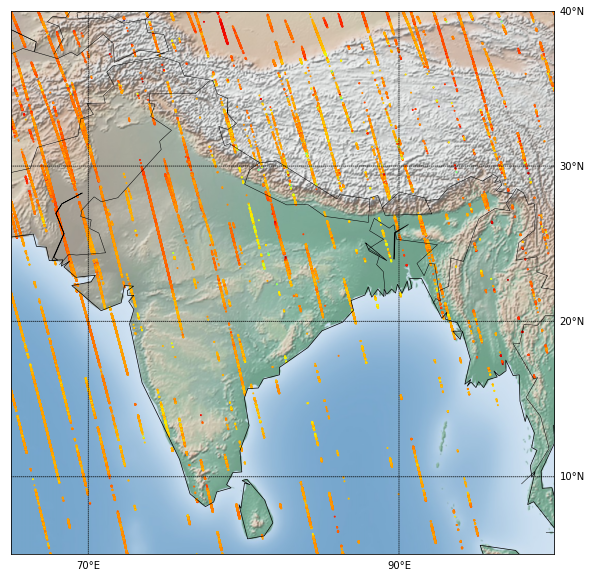

In [0]:
# And plot only the concerned area
draw_map(data_india, lon_min=65, lon_max=100, lat_min=5, lat_max=40, frontier=True)

---

## Retrieve1 orbit of the dataset

##### **get_orbit_data**: retrieve all data points for a specific orbit

Parameters:

*   (DataFrame) **data**: the origin dataset. 
*   (int) **orbit**: the id of the wanted orbit.
*   (string) **column**: the name of the orbit id column. *default: 'orbit'*

Return:

*   (DataFrame) the dataset containing all the data points of the specified orbit.

In [0]:
def get_orbit_data(data, orbit, column='orbit'):
    return data[data[column] == orbit]

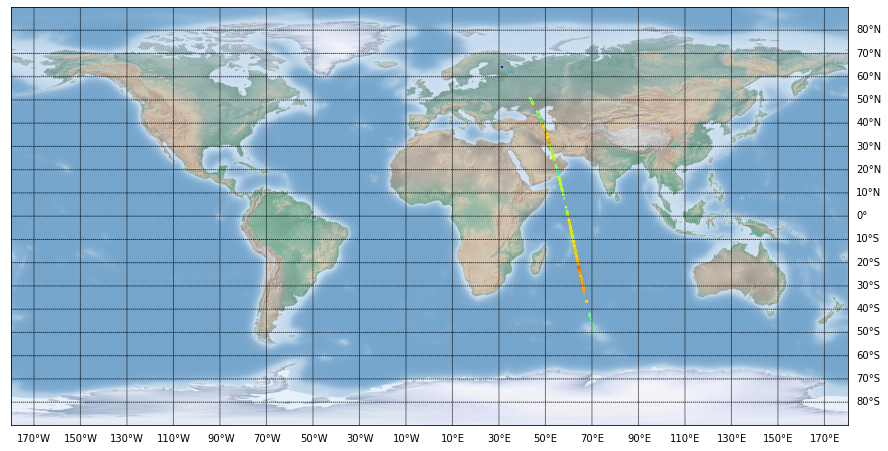

In [0]:
data_12001 = get_orbit_data(data, orbit=12001)

draw_map(data_12001)